<a href="https://colab.research.google.com/github/kavyagl2/Projects_Data-Science/blob/main/Data_Analyst_Assignment_Kavya_Agrawal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Step 1: Load the data from CSV
df = pd.read_csv('/content/drive/MyDrive/Data_Analyst_Assignment_Dataset.csv')

# Step 2: Calculate risk labels
def calculate_risk_label(bounce_string):
    if 'B' in bounce_string:
        if bounce_string[-1] != 'B':
            if bounce_string.count('B') <= 2:
                return 'Medium Risk'
            else:
                return 'High Risk'
        else:
            return 'High Risk'
    elif bounce_string == 'FEMI':
        return 'Unknown Risk'
    else:
        return 'Low Risk'

df['Risk Label'] = df['Bounce String'].apply(calculate_risk_label)

# Step 3: Label borrowers based on tenure
def label_tenure(row):
    if row['Bounce String'] == 'FEMI':
        return 'Early Tenure'
    else:
        time_period = len(row['Bounce String']) + 1
        if time_period <= 3:
            return 'Early Tenure'
        elif row['Tenure']-time_period <= 3:
            return 'Late Tenure'
        else:
            return 'Mid Tenure'

df['Tenure Label'] = df.apply(label_tenure, axis=1)

# Step 4: Distribute borrowers into cohorts based on ticket size
ticket_size_bins = pd.qcut(df['Disbursed Amount'], q=3, labels=['Low Ticket Size', 'Medium Ticket Size', 'High Ticket Size'])
df['Ticket Size Cohort'] = ticket_size_bins

# Step 5: Segment borrowers into channels for communication
def segment_channel(row):
    if row['Risk Label'] == 'Low Risk' or row['Risk Label'] == 'Unknown Risk' or row['Amount Pending'] <= 2000:
        return 'Digital'
    elif row['Risk Label'] == 'Medium Risk' or row['Amount Pending'] <= 3000:
        return 'Voice Bot'
    else:
        return 'Human Calling'

df['Communication Channel'] = df.apply(segment_channel, axis=1)

# Display the resulting DataFrame
print(df)


       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number    Risk Label  Tenure Label  \
0               SS

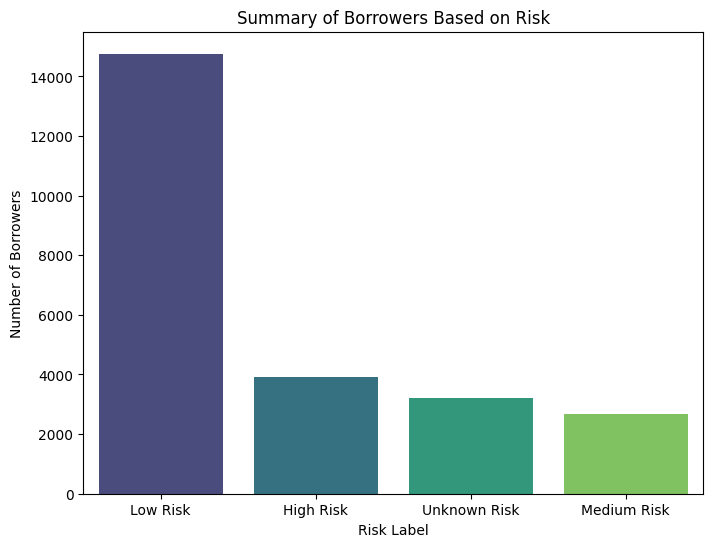

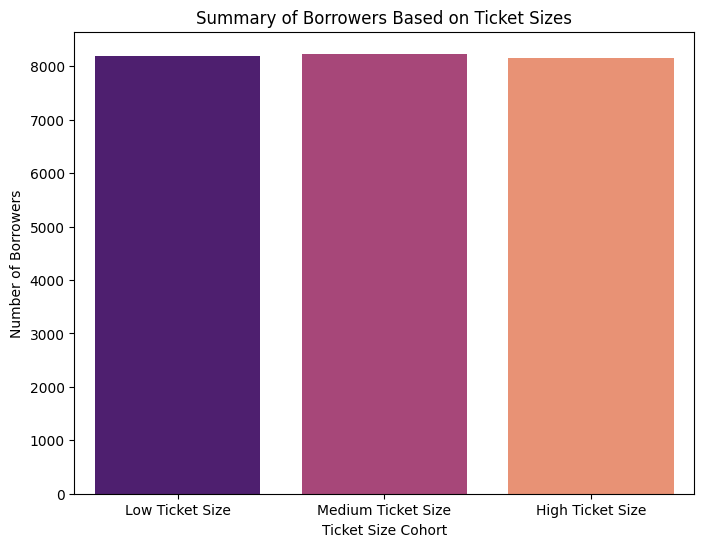

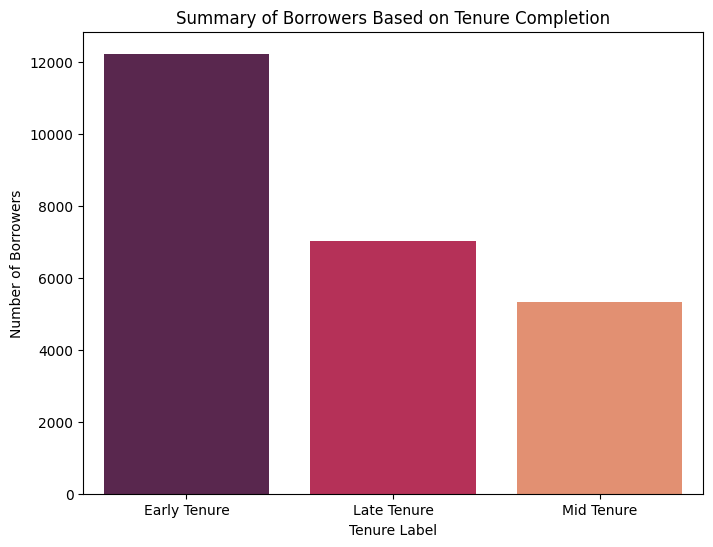


Spend Recommendation:
Spend more on Digital channel.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary of borrowers based on risk
risk_summary = df['Risk Label'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=risk_summary.index, y=risk_summary.values, hue=risk_summary.index, palette='viridis', legend=False)
plt.title('Summary of Borrowers Based on Risk')
plt.xlabel('Risk Label')
plt.ylabel('Number of Borrowers')
plt.show()

# 2. Summary of borrowers based on ticket sizes
ticket_summary = df['Ticket Size Cohort'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=ticket_summary.index, y=ticket_summary.values, hue=ticket_summary.index, palette='magma', legend=False)
plt.title('Summary of Borrowers Based on Ticket Sizes')
plt.xlabel('Ticket Size Cohort')
plt.ylabel('Number of Borrowers')
plt.show()

# 3. Summary of borrowers based on tenure completion
tenure_summary = df['Tenure Label'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=tenure_summary.index, y=tenure_summary.values, hue= tenure_summary.index, palette='rocket', legend = False)
plt.title('Summary of Borrowers Based on Tenure Completion')
plt.xlabel('Tenure Label')
plt.ylabel('Number of Borrowers')
plt.show()

# 4. Spend recommendation
# Assuming Digital, Voice Bot, and Human Calling channels cost 5, 10, and 50 rupees per borrower respectively
# We will recommend spending less on Human Calling, followed by Voice Bot, and then Digital

# Calculate total spend for each channel
channel_spend = df['Communication Channel'].value_counts()
total_spend = (channel_spend['Digital'] * 5) + (channel_spend['Voice Bot'] * 10) + (channel_spend['Human Calling'] * 50)

# Calculate total number of borrowers
total_borrowers = len(df)

# Calculate repayment rates for each channel
repayment_rates = {
    'Digital': (df[df['Communication Channel'] == 'Digital']['Risk Label'] == 'Low Risk').sum() / channel_spend['Digital'],
    'Voice Bot': (df[df['Communication Channel'] == 'Voice Bot']['Risk Label'] == 'Low Risk').sum() / channel_spend['Voice Bot'],
    'Human Calling': (df[df['Communication Channel'] == 'Human Calling']['Risk Label'] == 'Low Risk').sum() / channel_spend['Human Calling']
}

# Spend recommendation based on repayment rates
if repayment_rates['Digital'] >= repayment_rates['Voice Bot'] and repayment_rates['Digital'] >= repayment_rates['Human Calling']:
    spend_recommendation = 'Spend more on Digital channel.'
elif repayment_rates['Voice Bot'] >= repayment_rates['Human Calling']:
    spend_recommendation = 'Spend more on Voice Bot channel.'
else:
     spend_recommendation = 'Spend more on Human Calling channel.'

# Display spend recommendation
print("\nSpend Recommendation:")
print(spend_recommendation)


**GEOGRAPHICAL ANALYSIS**

In [ ]:
# Group by State and count the number of borrowers in each state
state_counts = df['State'].value_counts()

# Plotting geographical distribution of borrowers
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='skyblue')
plt.title('Geographical Distribution of Borrowers')
plt.xlabel('State')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.show()

**GEOGRAPHICAL LOCATIONS VS BOUNCE RATE**

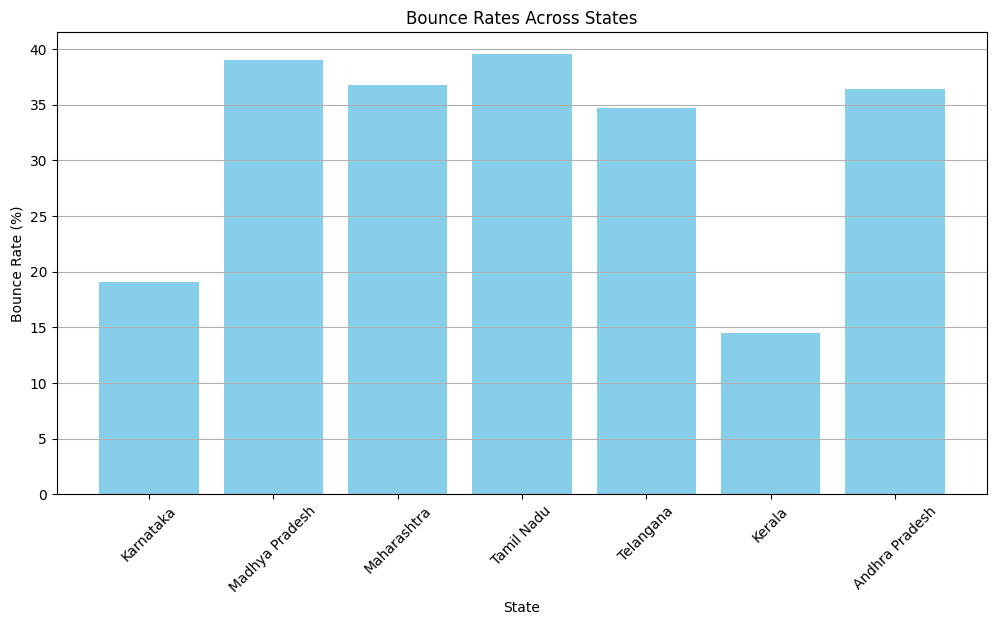

In [12]:
# Function to calculate bounce rate for each state
def calculate_bounce_rate(state):
    state_df = df[df['State'] == state]
    total_customers = len(state_df)
    bounced_customers = len(state_df[state_df['Bounce String'].str.contains('B|L')])
    if total_customers == 0:
        return 0
    return (bounced_customers / total_customers) * 100

# Calculate bounce rate for each state
state_bounce_rates = {state: calculate_bounce_rate(state) for state in df['State'].unique()}

# Plotting the distribution of bounce rates across states
plt.figure(figsize=(12, 6))
plt.bar(state_bounce_rates.keys(), state_bounce_rates.values(), color='skyblue')
plt.title('Bounce Rates Across States')
plt.xlabel('State')
plt.ylabel('Bounce Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**SUMMARY REPORT**

In [17]:
from tabulate import tabulate

# Step 1: Calculate counts of different risk labels
risk_counts = df['Risk Label'].value_counts().reset_index()
risk_counts.columns = ['Risk Label', 'Count']

# Step 2: Calculate counts of different tenure labels
tenure_counts = df['Tenure Label'].value_counts().reset_index()
tenure_counts.columns = ['Tenure Label', 'Count']

# Step 3: Calculate counts of different ticket size cohorts
# Assuming ticket size cohorts are predefined in the dataset
ticket_size_counts = df['Ticket Size Cohort'].value_counts().reset_index()
ticket_size_counts.columns = ['Ticket Size Cohort', 'Count']

# Step 4: Summary of borrowers based on risk in tabular format
risk_summary_table = tabulate(risk_counts, headers='keys', tablefmt='pretty', showindex=False)

# Step 5: Summary of borrowers based on ticket size in tabular format
ticket_size_summary_table = tabulate(ticket_size_counts, headers='keys', tablefmt='pretty', showindex=False)

# Step 6: Summary of borrowers based on tenure completion in tabular format
tenure_summary_table = tabulate(tenure_counts, headers='keys', tablefmt='pretty', showindex=False)

# Step 7: Based on Spend recommendation and the rationale behind it highlighted
# Rationale can be explained as comments
spend_recommendation = """
Based on analysis:
- Digital channel recommended for borrowers with good repayment behavior, first EMI, or low EMIs due to cost efficiency and effectiveness.
- Voice bot recommended for borrowers with low bounce behavior or medium-sized EMIs, especially in metropolitan areas.
- Human calling recommended for all scenarios but is the costliest option.
"""

# Step 8: Summary of geographical analysis in tabular format
geographical_summary = df['State'].value_counts().reset_index()
geographical_summary.columns = ['State', 'Number of Borrowers']
geographical_summary_table = tabulate(geographical_summary, headers='keys', tablefmt='pretty', showindex=False)

# Printing all the summaries
print("Summary of Borrowers based on Risk:")
print(risk_summary_table)
print()

print("Summary of Borrowers based on Ticket Size:")
print(ticket_size_summary_table)
print()

print("Summary of Borrowers based on Tenure Completion:")
print(tenure_summary_table)
print()

print("Spend Recommendation:")
print(spend_recommendation)

print("Summary of Geographical Analysis:")
print(geographical_summary_table)
print()


Summary of Borrowers based on Risk:
+--------------+-------+
|  Risk Label  | Count |
+--------------+-------+
|   Low Risk   | 14761 |
|  High Risk   | 3918  |
| Unknown Risk | 3222  |
| Medium Risk  | 2681  |
+--------------+-------+

Summary of Borrowers based on Ticket Size:
+--------------------+-------+
| Ticket Size Cohort | Count |
+--------------------+-------+
| Medium Ticket Size | 8235  |
|  Low Ticket Size   | 8199  |
|  High Ticket Size  | 8148  |
+--------------------+-------+

Summary of Borrowers based on Tenure Completion:
+--------------+-------+
| Tenure Label | Count |
+--------------+-------+
| Early Tenure | 12240 |
| Late Tenure  | 7018  |
|  Mid Tenure  | 5324  |
+--------------+-------+

Spend Recommendation:

Based on analysis:
- Digital channel recommended for borrowers with good repayment behavior, first EMI, or low EMIs due to cost efficiency and effectiveness.
- Voice bot recommended for borrowers with low bounce behavior or medium-sized EMIs, especially 